In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  
df = pd.read_csv('C:/dataflights/untidy/auto-mpg.data') 
df.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


### Naming the dataframe columns according to the attributes provided in auto-mpg.names

In [249]:
column_name = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin','Car Name']

### Cleaning the data 
-Used delim_whitespace to specify that whitespace will be used as a separator

In [250]:
car_list = pd.read_csv('C:/dataflights/untidy/auto-mpg.data', names = column_name ) 
car_list = pd.read_csv('C:/dataflights/untidy/auto-mpg.data', delim_whitespace = True, names = column_name)  
car_list.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Used replace() to replace the value '?' with Not A Number values and converting it to numeric

In [251]:
car_list['Horsepower'] = car_list['Horsepower'].replace('?', np.NaN) 
car_list['Horsepower'] = car_list['Horsepower'].astype(float) 
car_list['Horsepower'].dtype

dtype('float64')

### Used replace() to replace the origin values in accordance to assignment instructions

In [252]:
car_list['Origin'].replace(1,'USA',inplace=True)
car_list['Origin'].replace(2,'Asia',inplace=True)
car_list['Origin'].replace(3,'Europe',inplace=True)

In [253]:
car_list.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


### Created a variable that contains the value count for each cylinder given in the dataset(3,4,5,6,8). Then proceeded to graph the variable to show the distribution of the cylinders

In [254]:
cylinder_count = car_list['Cylinders'].value_counts()[[3,4,5,6,8]]
cylinder_count

3      4
4    204
5      3
6     84
8    103
Name: Cylinders, dtype: int64

Text(0, 0.5, 'Count')

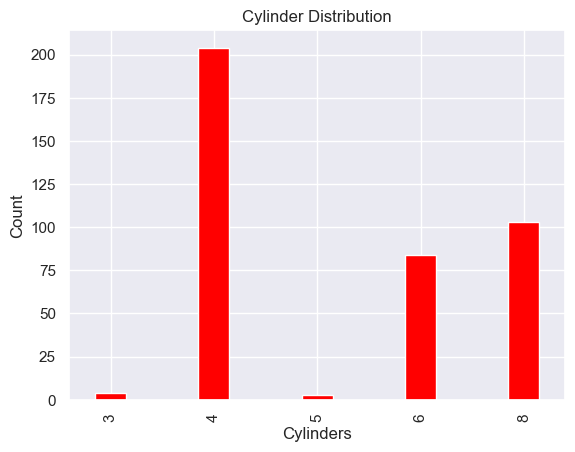

In [256]:
sns.set(style='darkgrid')
cylinder_count.plot(title = 'Cylinder Distribution', kind='bar', color = 'red', width = .3)
plt.xlabel('Cylinders')
plt.ylabel('Count')

### Converted the values in 'Horsepower' and 'Weight' from strings to floats in order to create the scatter plot

In [257]:
car_list['Horsepower'] = car_list['Horsepower'].astype(float) 
car_list['Weight'] = car_list['Weight'].astype(float)

### Scatter plot showing the relationship between Horsepower and Weight, done with Matplotlib

<AxesSubplot:title={'center':'Relationship between Horsepower and Weight'}, xlabel='Weight', ylabel='Horsepower'>

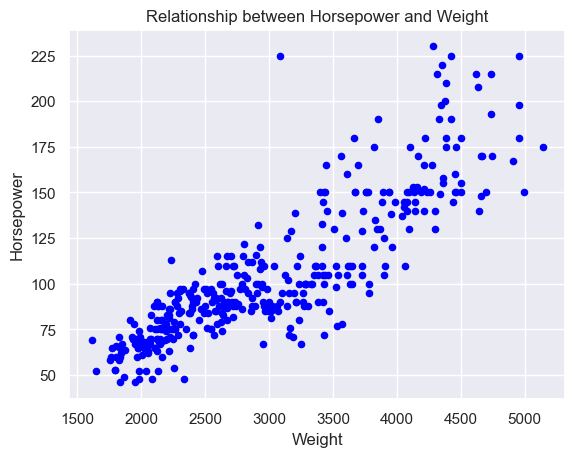

In [258]:
car_list.plot(title = 'Relationship between Horsepower and Weight', kind = 'scatter', x = 'Weight', y = 'Horsepower', color = 'blue')

###### In response to the oil price shocks of the early 1970s, the US Congress passed the nation's first Corporate Average Fuel Economy(CAFE) standards in 1975. The law called for a doubling of passenger-vehicle efficiency to 27.5 miles per gallon (MPG) within 10 years. I decided to group the data set by USA, and make a histogram to show how the US was fairing in MPG with the 1970 and 1971 models in the data set.

Text(0, 0.5, 'Frequency')

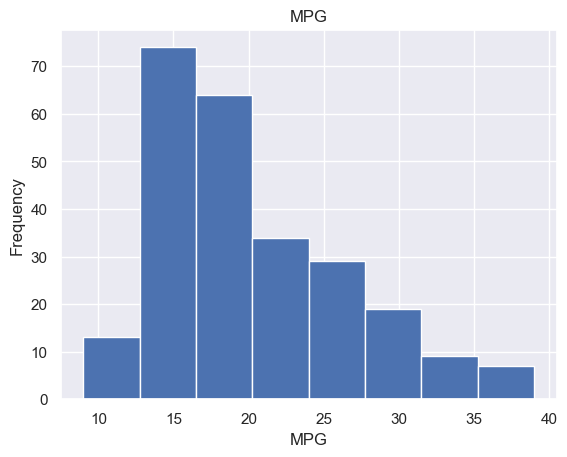

In [259]:
group = car_list.groupby('Origin')  
USA = group.get_group('USA') 
USA.hist('MPG', bins= 8) 
plt.xlabel('MPG')
plt.ylabel('Frequency')